<a href="https://colab.research.google.com/github/hamsini505/Wise-Project-ML-/blob/main/cookingclassy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
cols = ['Title', 'Ingredients']
data  = pd.read_csv('/content/indian_food (1).csv',names = cols)
data

,Title,Ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar"
1,Boondi,"Gram flour, ghee, sugar"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,..."
...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur"
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all..."
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ..."
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all..."


In [ ]:
data.head()

,Title,Ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar"
1,Boondi,"Gram flour, ghee, sugar"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        255 non-null    object
 1   Ingredients  255 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [ ]:
data[~data['Ingredients'].isnull()]

,Title,Ingredients
0,Balu shahi,"Maida flour, yogurt, oil, sugar"
1,Boondi,"Gram flour, ghee, sugar"
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins"
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su..."
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,..."
...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur"
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all..."
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ..."
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all..."


In [ ]:
features = data['Ingredients']
features
print(type(features))

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(features)
vector = vectorizer.transform(features)
columnNames = vectorizer.get_feature_names()
resArray = vector.toarray()
#print(type(resArray))

In [ ]:
len(columnNames)

336

In [ ]:
df2 = pd.DataFrame(data=resArray,columns=columnNames)
data = pd.concat([data,df2], axis=1)
data 

,Title,Ingredients,acid,all,almond,almonds,aloo,alum,amaranth,amchur,and,anise,apricots,arbi,arhar,arrowroot,atta,avocado,axone,baby,badam,bags,baingan,baking,bamboo,banana,basmati,bay,bean,beans,beaten,beef,beetroot,bell,bengal,besan,bhaji,bhatura,bhuna,biryani,...,star,steamer,stick,sticky,sugar,sunflower,surti,sweet,sweetened,syrup,tamarind,tandoori,tea,thick,thighs,thin,tindora,tomato,tomatoes,toor,turmeric,urad,valor,vegetable,vegetables,vermicelli,vinegar,water,watercress,wheat,whipping,white,whole,wild,wine,yam,yellow,yoghurt,yogurt,yolks
0,Balu shahi,"Maida flour, yogurt, oil, sugar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Boondi,"Gram flour, ghee, sugar",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = data.drop(['Title', 'Ingredients'],axis = 1)
target = data['Title']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.1,random_state = 45)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(229, 336)
(229,)
(26, 336)
(26,)


In [ ]:
from sklearn import metrics
train_acc_list = []
test_acc_list = []

k_range =range(1,51)
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  y_pred_train = knn.predict(x_train)
  y_pred_test = knn.predict(x_test)
  train_acc_list.append(metrics.accuracy_score(y_train,y_pred_train))
  test_acc_list.append(metrics.accuracy_score(y_test,y_pred_test))

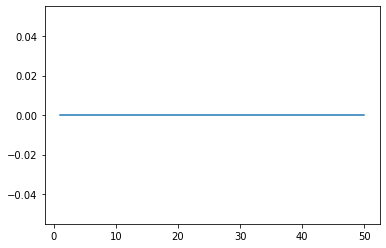

In [ ]:
plt.plot(k_range,test_acc_list)

In [ ]:
knn = KNeighborsClassifier(n_neighbors =7)
knn.fit(x_train,y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
print(metrics.accuracy_score(y_train,y_pred_train))
print(metrics.accuracy_score(y_test,y_pred_test))

0.1703056768558952
0.0


In [ ]:
for depth in range(1,20):
  decision_tree = DecisionTreeClassifier(max_depth=depth)
  decision_tree = decision_tree.fit(x_train,y_train)
  print(depth)
  print(f"train accuracy: {metrics.accuracy_score(y_train,y_pred_train):.3f}")
  print(f"test accuracy: {metrics.accuracy_score(y_test,y_pred_test):.3f}")
  print(f"train f1: {metrics.f1_score(y_train,y_pred_train,average='weighted'):.3f}")
  print(f"test f1: {metrics.f1_score(y_test,y_pred_test,average='weighted'):.3f}")

1
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
2
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
3
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
4
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
5
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
6
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
7
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
8
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
9
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
10
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
11
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
12
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
13
train accuracy: 0.170
test accuracy: 0.000
train f1: 0.110
test f1: 0.000
14
train

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred= classifier.predict(x_test) 
y_pred

array(['Kaju katli', 'Koshambri', 'Jalebi', 'Mihidana',
       'Paneer butter masala', 'Rongi', 'Mawa Bati', 'Dhondas',
       'Koldil Chicken', 'Cheera Doi', 'Gatta curry', 'Laddu',
       'Aloo matar', 'Dahi vada', 'Gavvalu', 'Methi na Gota',
       'Cheera Doi', 'Prawn malai curry', 'Dhondas', 'Poha',
       'Paneer butter masala', 'Dhondas', 'Pithe', 'Misti doi',
       'Haq Maas', 'Kofta'], dtype=object)

In [ ]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)
print(metrics.accuracy_score(y_train,y_pred_train))
print(metrics.accuracy_score(y_test,y_pred_test))

0.982532751091703
0.0
